In [15]:
import numpy as np
import pandas as pd

In [16]:
all_data = pd.read_csv("forest_dataset.csv")
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [17]:
all_data.shape

(10000, 55)

In [18]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [19]:
from sklearn.model_selection import train_test_split

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

In [25]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(solver='saga')

param_grid = {'C': np.arange(1, 5),
              'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(feature_matrix, labels)

print(search.best_params_)

accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

{'C': 4, 'penalty': 'l2'}


c:\Users\Danko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6416

In [26]:
#задание 1
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

accuracy_score(test_labels, y_pred)    

0.7365

In [27]:
#задание 2 - 4
param_grid = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
}

clf_grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

clf_grid.fit(feature_matrix, labels)
print(clf_grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [31]:
#задание 5
optimal_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights="distance")
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict(test_feature_matrix)

<function matplotlib.pyplot.show(close=None, block=None)>

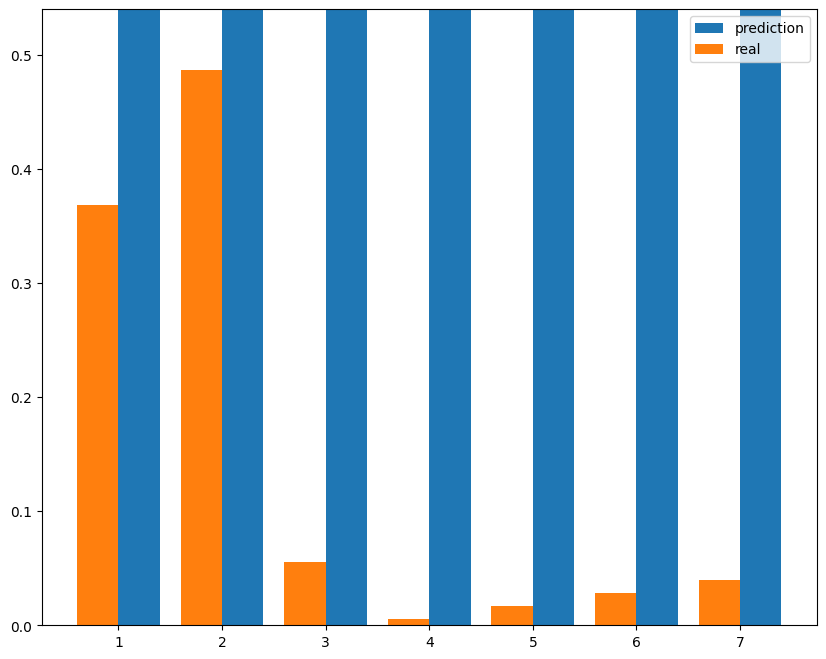

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels), freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align='edge', label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align='edge', label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show